In [2]:
from setup_libs import *
%matplotlib inline


# Compositions, Ensembles, RandomForest

# 1. Bootstrap

### Задача
Пусть преподаватель на паре предложил угадать студентам свой возраст. Но на пары, конечно же, ходит максимум 10 человек из 60, поэтому он получил ответы: 
$$37, 43, 38, 36, 17, 40, 40, 45, 41, 84$$ 

Теперь посчитаем среднее и его [стандартную ошибку](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%B0%D0%BD%D0%B4%D0%B0%D1%80%D1%82%D0%BD%D0%B0%D1%8F_%D0%BE%D1%88%D0%B8%D0%B1%D0%BA%D0%B0).

In [193]:
from scipy.stats import sem
x = np.array([37,43,38,36,17,40,40,45,41,84])
x.mean(), sem(x)

(42.1, 5.25452186216786)

В такой маленькой выборке среднее и стандартная ошибка будут очень сильно реагировать на ответы двух `одаренных` учеников: $(17, 84)$. Можем ли мы как-то решить данную проблему?

На самом деле да: давайте сделаем предположение, что данное эмпирическое распределение верно и для 1000 чел. Тогда можно воспользоваться алгоритмом **Бутстрапа**.

----

Немного обобщим задачу:

Пусть имеется выборка $X$ размера $N$, где $N$ крайне мало. И мы хотим посчитать некоторую **статистику** на ней.

**Статистика** — измеримая числовая функция от выборки, не зависящая от неизвестных параметров распределения элементов выборки. Например среднее, медиана, дисперсия и.т.д.


### Алгоритм Bootstrap 
* Равномерно возьмем из выборки $N$ объектов **с возвращением**. То есть мы хотим сгенерировать псевдовыборку, в которой могут повторятся элементы из исходной выборки. 

* Обозначим новую выборку через $X_1$. Повторяя процедуру $B$ раз, сгенерируем $M$ подвыборок $X_1, \dots, X_B$. 

* Посчитаем статистику T от каждой выборки $(T(X_1), \ldots, T(X_n))$

* Найдем итоговую статистику $T(X) = \frac{1}{B}\sum^{B}_{i}T(X_i)$


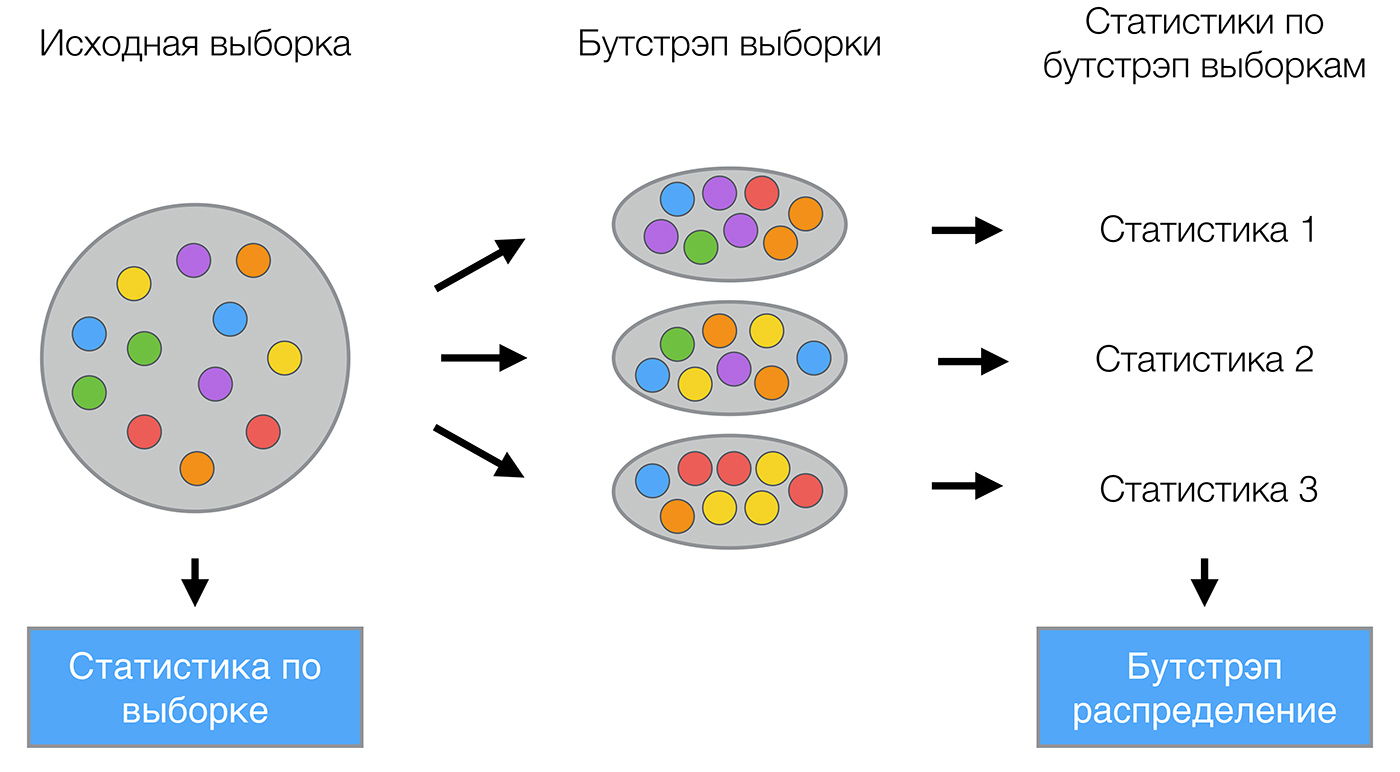

In [3]:
Image('images/bootstrap.jpg', width=500)

## Пример 

C помощью алгоритма сгенерируем 10 выборок

```
 [36 43 36 40 41 84 40 40 37 84]
 [37 37 41 43 17 45 36 37 84 45]
 [40 45 41 41 84 17 38 17 84 36]
 [43 45 40 36 37 38 17 37 41 45]
 [40 38 84 36 40 84 45 17 40 43]
 [41 40 84 43 17 36 40 37 37 38]
 [17 40 41 40 40 38 45 43 84 84]
 [43 38 45 36 17 38 41 37 41 84]
 [40 40 36 36 38 36 40 38 41 38]
 [43 41 40 45 45 40 36 36 36 36]
```
У каждой выборки посчитаем среднее и стандартную ошибки, а потом усредним их

mean=42.78, se_mean=4.673017491077988


Таким образом мы **уменьшили** $SE$ (standart error) и более точно можно определить мат. ожидание.

На самом деле 10 выборок - это очень мало, и значения среднего и стандартной ошибки будут часто `плавать`. Но именно благодаря тому, что мы можем увеличивать количество выборок $B$ - мы можем уменьшить доверительный интервал и увидеть точное значение. Например взяв миллион выборок.

---

## Дополнительно

Вообще бутстрап дает возможность работать не только со средним, но и с любой статистикой. Более того, бутстрап порой единственный способ посчитать доверительные интервалы для нелинейных статистик например $ln\overline{X}$ (логарифм среднего), потому что стандартная ошибка данной статистики не считается аналитически. 

Доказательство корректности алгоритма Бутстрап проводится не трудно через Усиленный Закон Больших Чисел. Для всех интересующихся [ссылка](http://www.stat.cmu.edu/~larry/=sml/Boot.pdf).

# 2.Bias-Variance decomposition.

Рассмотрим задачу **регрессии** 

Введем обозначения:
* $X$ - множество объектов (векторов)
* $f(x)$ - реальная функция мира, которую хотим предсказать
* $y: y_i = f(x_i) + \varepsilon_i ~~~(\varepsilon_i \in \mathcal{N}(0,\sigma))$ - множество померенных значений (**target**) с некоррелированным шумом
* $a(x)$ - наш регрессор, который подбираем
* $L(x,y) = (a(x) - y)^2$ - функция потерь (MSE)

В кросс-энтропии мы смотрели на `качество` модели, как на возможность обучиться на различных данных и давать одинаково хороший результат. Давайте рассматривать регрессор $a(x)$ как случайную величину, зависящую от выборки $(X_{train}, y_{train})$.

Мы хотим найти некий *идеальный* классификатор $a_{(X, y)}(x)$, который **в среднем относительно обучающей выборки** имеет наименьшую ошибку на **одном объекте (x,y)**. 

$$Error = \mathbb{E}_{(X_{train}, y_{train})}(a_{(X_{train}, y_{train})}(x)-y)^2$$

$(X_{train}, y_{train})$ - имеют какую-то **абстрактную** вероятностную меру в своем пространстве $\mathbb{X}$, поэтому можем взять мат. ожидание. $y=f(x) + \varepsilon$, $\varepsilon \sim \mathcal{N}(0, \sigma^2)$ аналогично тренировочной выборке

Для упрощения дальнейшей нотации буду писать просто мат. ожидание по $a$.

$$Error = \mathbb{E}_{a}(a(x)-y)^2 \rightarrow \min$$



Данное выражение можно разложить как

$$\mathbb{E}_{a}(a(x)-y)^2 = 
\underbrace{\Big(\mathbb{E}_{a}[a(x)] - f(x)\Big)^2}_{Bias} + 
\underbrace{\mathbb{D}_{a}a(x)}_{Variance} + 
\underbrace{\sigma^2}_{Noise}$$

1. **Смещение (Bias)** - отклонение мат. ожидания ответа алгоритма от **реальной** функции.
2. **Разброс (Variance)** - разброс, среди возможных алгоритмов $a(\cdot)$, обученных на разных тренировочных выборках.
3. **Шум (Noise)** - шум из неточных данных.

Аналогично все можно расписать в терминах для нескольких объектов:

$$Error = \frac{1}{N}\sum_{x,y \in (X_{test}, y_{test})}\mathbb{E}_{a}(a(x)-y)^2$$

$$\frac{1}{N}\sum_{x,y \in (X_{test}, y_{test})}\mathbb{E}_{a}(a(x)-y)^2 = 
\frac{1}{N}\sum_{x,y \in (X_{test}, y_{test})}\underbrace{\Big(\mathbb{E}_{a}[a(x)] - f(x)\Big)^2}_{Bias} + 
\frac{1}{N}\sum_{x,y \in (X_{test}, y_{test})}\underbrace{\mathbb{D}_{a}a(x)}_{Variance} + 
\underbrace{\sigma^2}_{Noise}$$

На самом деле все эти усреднения сверху, просто мат. ожидания по всему множеству $\mathbb{X}$, ведь `теоретически ` мы хотим чтобы наш алгоритм работал не только на тестовой выборке.

$$Error = \mathbb{E}_{(x,y)}\mathbb{E}_{a}(a(x)-y)^2$$

$$\mathbb{E}_{(x,y)}\mathbb{E}_{a}(a(x)-y)^2 = 
\mathbb{E}_{(x,y)}\underbrace{\Big(\mathbb{E}_{a}[a(x)] - f(x)\Big)^2}_{Bias} + 
\mathbb{E}_{(x,y)}\underbrace{\mathbb{D}_{a}a(x)}_{Variance} + 
\underbrace{\sigma^2}_{Noise}$$

## И зачем нам это?

Пусть мы обучаем линейную регрессию: в одном случае полином 1 степени, в другой 10-ой. 

В случае полинома **1 степени** мы обучаясь на разных тренировочных выборках мы будем получать примерно **одинаковый** результат. Однако полученные функции будут достаточно **сильно** отличаться от искомой функции **в точках**, на которых мы обучаемся. 

Тогда по нашей формуле мы получаем **большой Bias** и **малый Variance**

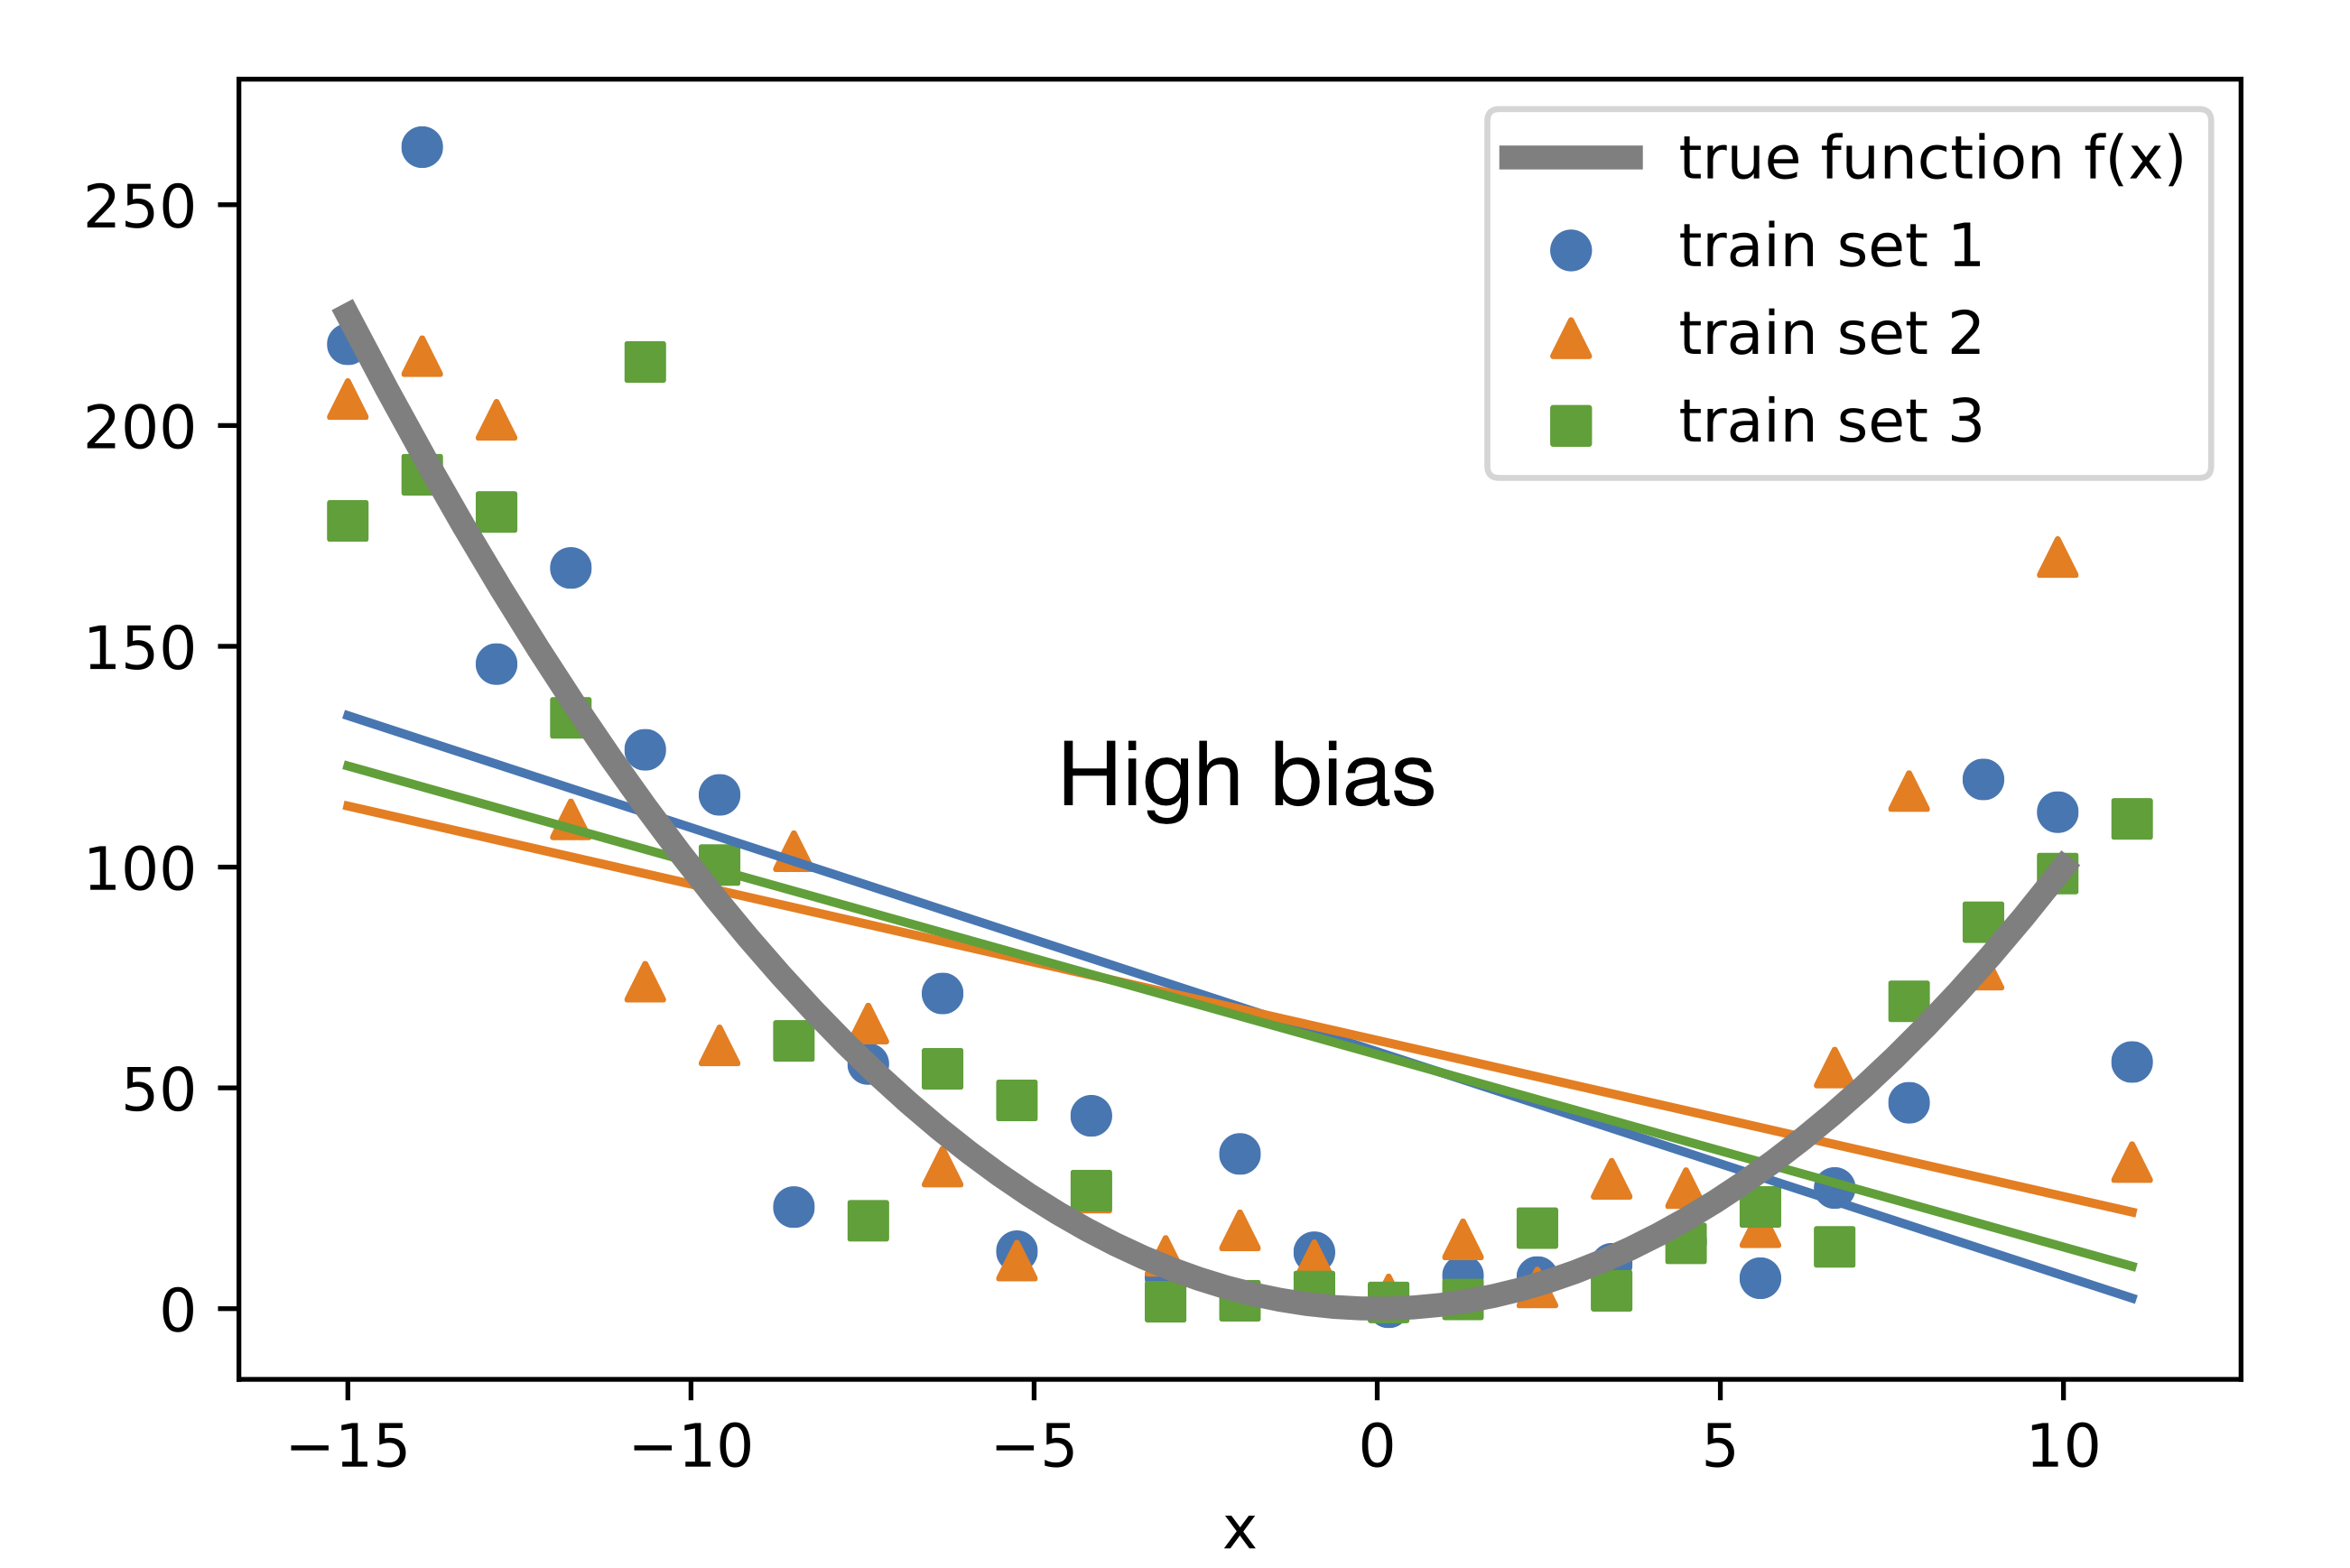

In [4]:
Image('images/bias.png', width=400)

В случае полинома **10 степени** мы обучаясь на разных тренировочных выборках мы будем получать сильно **отличающиеся** результаты. Однако полученные функции будут попадать **ровно в точки** искомой функции, на которых мы обучаемся. 

Тогда по нашей формуле мы получаем **малый Bias** и **большой Variance**

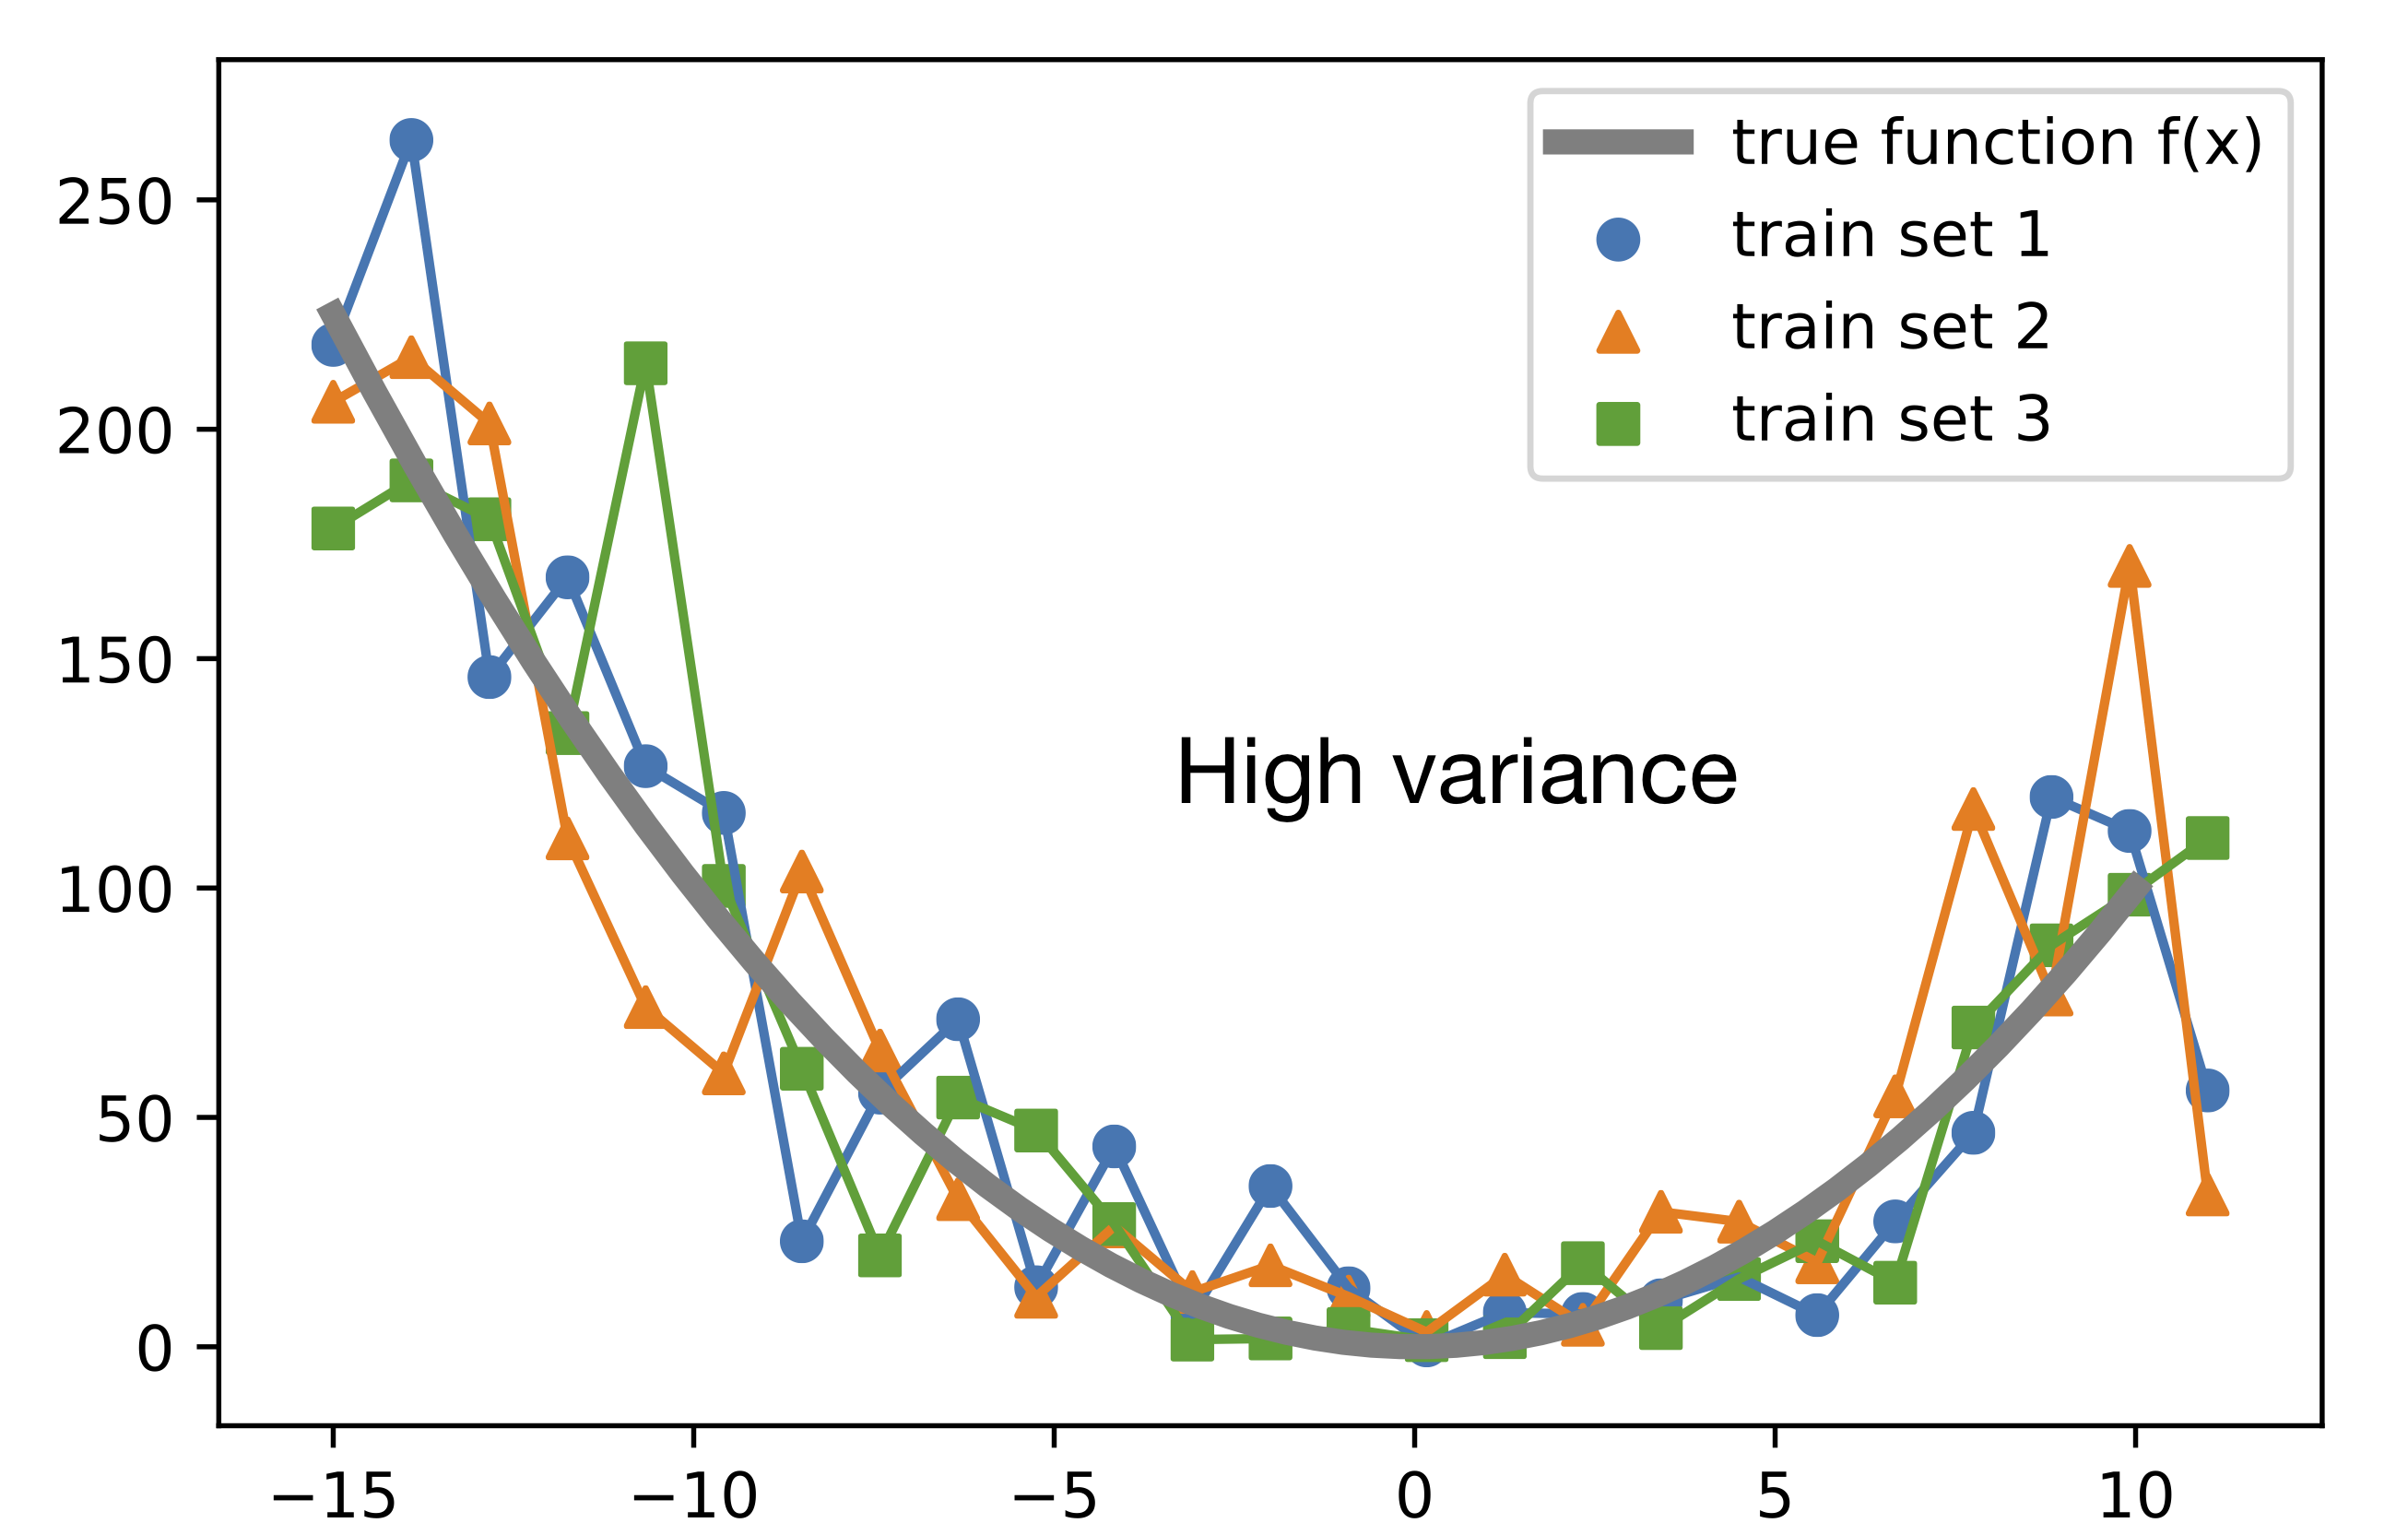

In [5]:
Image('images/variance.png', width=400)

### На самом деле мы получили чуть менее эвристическое обоснование переобучения и недообучения

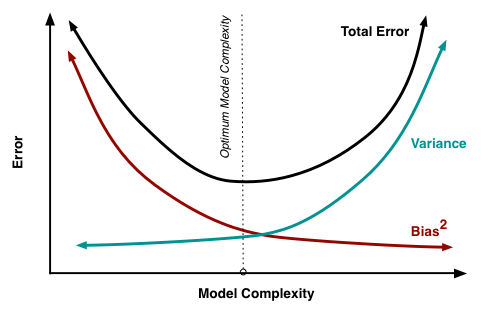

In [6]:
Image('images/biasvariance.png', width=400)

Вот еще одна наглядная картинка для рефлексии

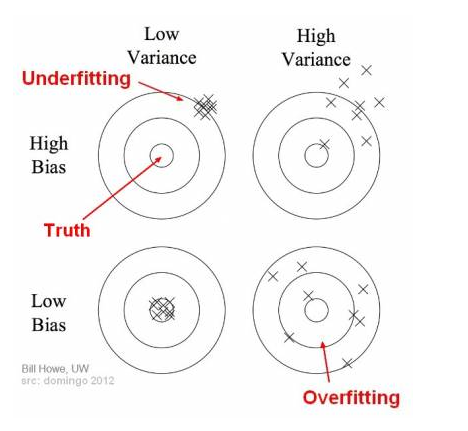

In [7]:
Image('images/bullseye.png', width=400)

## Математические пруфы

Доказательство разложения можно прочитать [здесь](https://towardsdatascience.com/mse-and-bias-variance-decomposition-77449dd2ff55).

## 2.1 А что там для классификации?

Вспомним какой **Error** у классификации:
$$L(x)=\begin{cases}0 ~~~\text{если правильно определили класс} \\ 1~~~\textrm{в другом случае}\end{cases}$$

В качетсве результата среди всех алгоритмов мы выбираем самое вероятное решение: **моду**
$$\mathbb{E}_aa(x) = argmax_{class}P(x \in class)$$

**Bias** в этом случае отклонение от моды

$$Bias(y)=\begin{cases}0 ~~~y = E_aa(x) \\ 1~~~y \neq E_aa(x)\end{cases}$$

**Variance**

$$Var(y) = P(y \neq E_aa(x))P(y = E_aa(x))$$

# 3. Bagging (bootsrap aggregating)

Вот теперь непосредственно можем перейти к теме семинара.

Давайте объединим предыдущие 2 идеи:
* Набутстрапим несколько псевдовыборок ($X_1, \ldots, X_B$) из нашей выборки $X$.
* Обучим на каждой псевдовыборке один и тот же алгоритм $a_1(\cdot), \ldots a_B(\cdot)$.
* А результат будем получать как среднее из выходов обученных моделей $$a(x) = \frac{1}{B}\sum_{i=1}^{B}a_i(x)$$

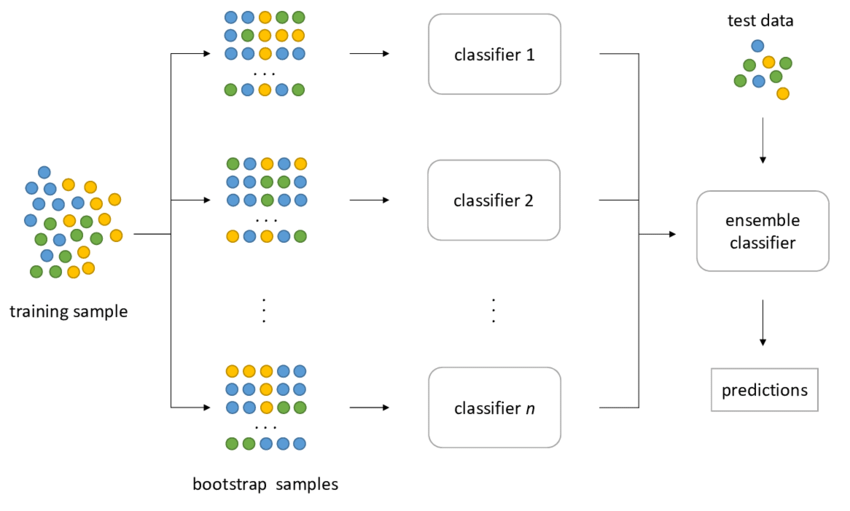

In [8]:
Image('images/bagging.png', width=500)

In [13]:
X, y = make_regression(n_samples=100, n_features=4, 
                       n_informative=2, n_targets=1,
                       random_state=0, shuffle=False)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True)

dtr = DTR(max_depth=3).fit(X_train, y_train)

br = BaggingRegressor(base_estimator=DTR(max_depth=3), #выбрали тип алгоритма a(x)
                        n_estimators=30, #количество регрессоров B 
                        random_state=0).fit(X_train, y_train)


print('DTR Loss:{} \nBagging Loss:{}'.format(MSE(dtr.predict(X_test), y_test),
                                             MSE(br.predict(X_test), y_test)))

DTR Loss:401.21273308735243 
Bagging Loss:150.0127291660213


Как можем заметить Loss у бэггинга заметно ниже, хотя мы использовали и в том и другом случае деревья одинаковой глубины

## Почему Лосс у Бэггинга меньше? (ВАЖНО)

Посмотрим на  **Bias**
$$\mathbb{E}_{a}[a(x)] - f(x))^2 = \Big(f(x) - \mathbb{E}_{a}\frac{1}{B}\sum_{b=1}^{B}a_b(x)\Big)^2 = \Big(f(x) - \mathbb{E}_{a}a_1(x)\Big)^2$$ 

По линейности мат. ожидания получаем, что **Bias у бэггинга такой же, как и у одной модели**.

Посмотрим на  **Variance**
$$\mathbb{D}_{a}a(x)= \mathbb{E}_{a}(a(x) - \mathbb{E}_{a}a(x))^2 = 
\mathbb{E}_{a}\Big[\frac{1}{B}\sum_{b=1}^{B}a_b(x)-\mathbb{E}_{a}\frac{1}{B}\sum_{b=1}^{B}a_b(x)\Big]^2=$$
$$=\mathbb{E}_{a}\Big[\frac{1}{B}\sum_{b=1}^{B}\Big(a_b(x)-\mathbb{E}_{a}a_1(x)\Big)\Big]^2 = 
\frac{1}{B^2}\mathbb{E}_{a}\Big[\sum_{b=1}^{B}\Big(a_b(x)-\mathbb{E}_{a}a_1(x)\Big)^2 + \sum_{b, c=1, b \neq c}^{B}\Big(a_b(x)-\mathbb{E}_{a}a_1(x)\Big)\Big(a_c(x)-\mathbb{E}_{a}a_1(x)\Big)\Big] = $$

$$=\frac{1}{B^2}\Big[\sum_{b=1}^{B}\mathbb{E}_{a}\Big(a_b(x)-\mathbb{E}_{a}a_1(x)\Big)^2\Big] + \frac{1}{B^2}\Big[\sum_{b, c=1, b \neq c}^{B}\mathbb{E}_{a}\Big(a_b(x)-\mathbb{E}_{a}a_1(x)\Big)\Big(a_c(x)-\mathbb{E}_{a}a_1(x)\Big)\Big] = $$

Если считать, что все алгоритмы равнозначны между собой (в смеси мы обычно так и предполагаем).
* Первое слагаемое - дисперсия алгоритма. 
* Второе слагаемое - ковариация между 2 алгоритмами. 

$$=\frac{1}{B}\mathbb{D}_{a}a_1(x) + \frac{B(B-1)}{B^2}\Big[\mathbb{E}_{a}\Big(a_2(x)-\mathbb{E}_{a}a_1(x)\Big)\Big(a_3(x)-\mathbb{E}_{a}a_1(x)\Big)\Big] = $$

$$\mathbb{D}_{a}a(x)=\frac{1}{B}\mathbb{D}_{a}a_1(x) + \frac{(B-1)}{B}cov(a_1(x), a_2(x))$$



Обычно данную формулу записывают, через коэффициент корреляции и стандартное отклонение.$\sigma^2 = D_aa_1(x)$ $\rho = \frac{cov(a_1(x), a_2(x))}{\sigma^2}$. Получаем:

$$Variance = \frac{\sigma^2}{B} + \sigma^2\frac{B-1}{B}\rho = \rho\sigma^2 + \frac{1 - \rho}{B}\sigma^2$$

**Получается**: пока деревья слабо коррелированы - мы можем сильно уменьшить **Variance**. Однако с какого-то момента деревьев станет слишком много, значит среди них будут попадаться сильно скоррелированные. Это и остановит уменьшение *Variance*.

## Bagging не меняет Bias, но позволяет уменьшить Variance за счет уменьшения дисперсии при слабо коррелированных деревьях.

В библиотеке `scikit-learn` есть реализация `BaggingRegressor` и `BaggingClassifier`, которая позволяет использовать большинство других алгоритмов "внутри". [Полезный пример](http://scikit-learn.org/stable/auto_examples/ensemble/plot_bias_variance.html#sphx-glr-auto-examples-ensemble-plot-bias-variance-py).


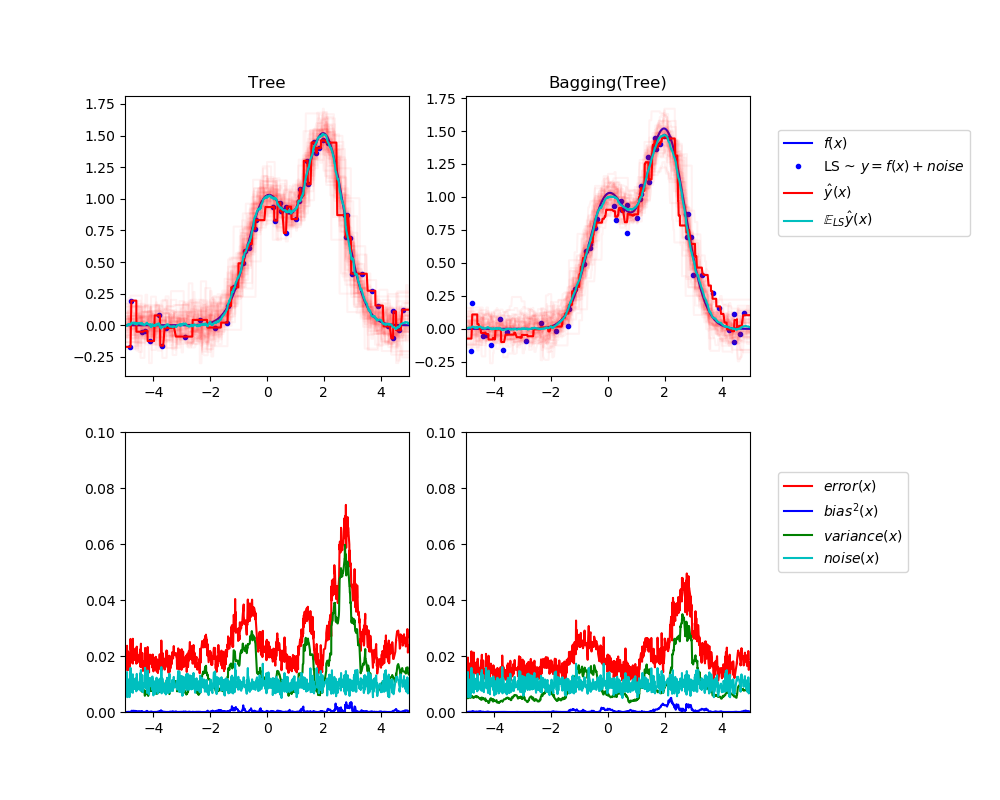

In [9]:
Image('images/bagging_exam.png', width=600)

## А что с классификацией?

Пусть у нас есть ансамбль классификаторов. Как выбрать предсказание для объекта?
* Возврщаем вероятности каждого класса для объекта в каждом классификаторе
* Усредняем вероятность каждого класса по классификаторам
* Присваеваем тот класс, который получил наибольшую среднюю вероятность по классификаторам

Пример (4 класса (`1,2,3,4`), 2 классификатора):
* $P{(a_1(x))} = {0.2,0.3,0.4,0.1}$
* $P{(a_2(x))} = {0.2,0.3,0.1,0.4}$
* $P{(a(x))} = {0.2,0.3,0.25,0.25}$
* $a(x) = 2$, $P(a(x)=2) = 0.3$

## 3.1 Out-of bag Error

Пусть в выборке $\ell$ объектов. На каждом шаге все объекты попадают в подвыборку с возвращением равновероятно, т.е отдельный объект — с вероятностью  $\frac{1}{\ell}.$ Вероятность того, что объект НЕ попадет в подвыборку (т.е. его не взяли $\ell$ раз): $(1 - \frac{1}{\ell})^\ell$. При $\ell \rightarrow +\infty$ получаем один из "замечательных" пределов $\frac{1}{e}$. Тогда вероятность попадания конкретного объекта в подвыборку $\approx  1 - \frac{1}{e} \approx 63\%$.


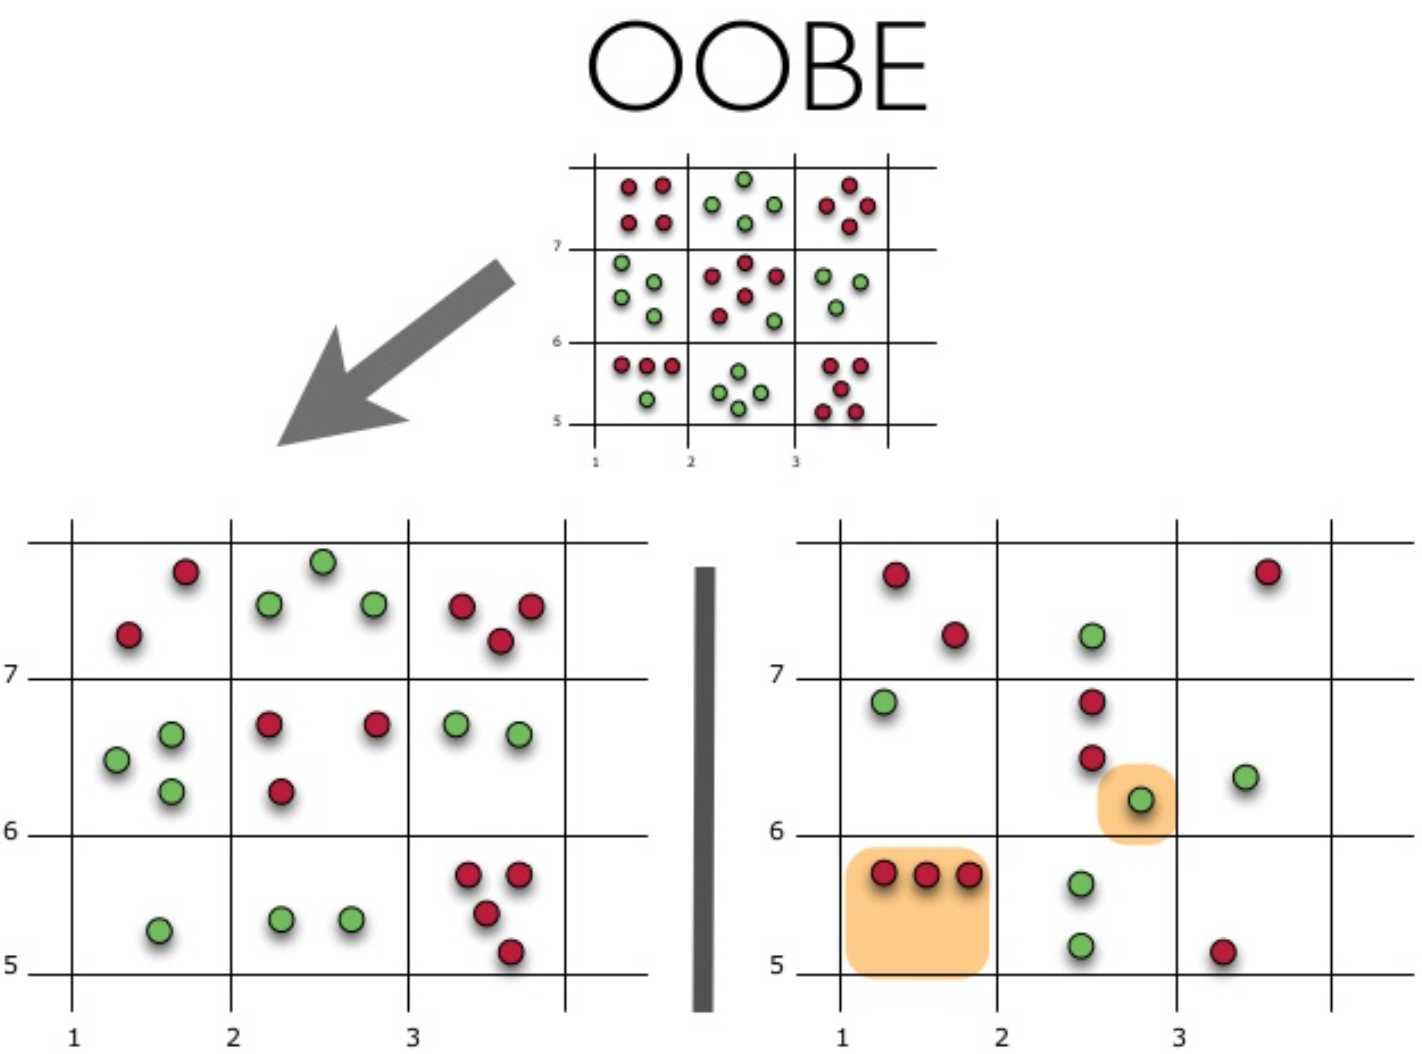

In [10]:
Image('images/oob.png',width=400)

На рисунке видно, что наш классификатор ошибся в 4 наблюдениях, которые мы не использовали для тренировки. Значит точность нашего классификатора: $\frac{11}{15}*100\% = 73.33\%$

Получается, что каждый базовый алгоритм обучается на ~63% исходных объектов. Значит, на оставшихся ~37% его можно сразу проверять. Out-of-Bag оценка — это усредненная оценка базовых алгоритмов на тех ~37% данных, на которых они не обучались.

In [279]:
X, y = make_regression(n_samples=1000, n_features=100, n_informative=100, n_targets=1, shuffle=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)


In [289]:
br = BaggingRegressor(base_estimator=DTR(),
                      n_estimators=200,
                      oob_score=True #включим использование oob
                     ).fit(X_train, y_train)
br.oob_score_ #ошибка на oob объектах

0.6656079059399933

# 4. Random Subspace Method (RSM)

Еще одна интересная эвристика: обучать алгоритмы не на всех фичах. Выберем (без повторений конечно же) некоторое число фич рандомно и на них будем обучаться

In [298]:
X, y = make_regression(n_samples=1000, n_features=100, n_informative=100, n_targets=1, shuffle=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)


In [303]:
def find_error(max_features_float):
    br = BaggingRegressor(base_estimator=DTR(max_features=max_features_float), #выбрали процент используемых фич
                          n_estimators=200,
                          max_features=0.33,
                          bootstrap_features=True).fit(X_train, y_train)
    return MSE(br.predict(X_test), y_test)



In [304]:
%%time
feature_percent = np.linspace(0.1, 1, 10)

errors = np.array([find_error(i) for i in feature_percent])

CPU times: user 14.4 s, sys: 10.5 ms, total: 14.5 s
Wall time: 14.5 s


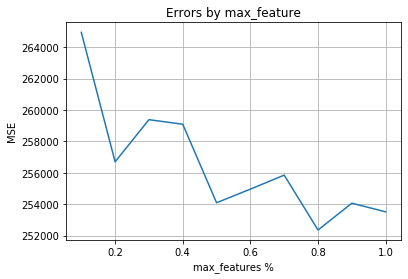

In [301]:
import matplotlib.pyplot as plt

plt.plot(feature_percent,errors)
plt.title('Errors by max_feature')
plt.ylabel('MSE')
plt.xlabel('max_features %')
plt.grid()

Я честно пытался разобраться как работает эта эвристика, но ничего не вышло.
Утвеждается, что:
* Для регрессии желательно использовать $k = n_{features}/3$ (max_features=0.33)
* Для классификации желательно использовать $k = \sqrt{(n_{features})}$ (max_features="sqrt")

# 5. RandomForest

![xkcd](https://imgs.xkcd.com/comics/in_the_trees.jpg)

**Идея**: совместим Bagging и RSM на DecisionTree.

Почему деревья? 

Бэггинг уменьшает $Variance$, но не можем никак повлиять на $Bias$. Значит нам нужно взять алгоритм, который может достигать минимального $Bias$. Деревья - отличный вариант, так как могут в том числе переобучиться и просто полностью запомнить выборку.

А метод случайных подпространств позволяет снизить коррелированность между деревьями и избежать переобучения. 

### Алгоритм

Алгоритм построения случайного леса, состоящего из $N$ деревьев, выглядит следующим образом:
* Для каждого $n = 1, \dots, N$:
     * Сгенерировать выборку $X_n$ с помощью bootstrap.
     * Построить решающее дерево $a_n$ по выборке $X_n$:
         — по заданному критерию мы выбираем лучший признак, делаем разбиение в дереве по нему и так до исчерпания выборки
         — дерево строится, пока в каждом листе не более $n_\text{min}$ объектов или пока не достигнем определенной высоты дерева
         — при каждом разбиении сначала выбирается $m$ случайных признаков из $n$ исходных, 
         и оптимальное разделение выборки ищется только среди них.
         
Итоговый классификатор $a(x) = \frac{1}{N}\sum_{i = 1}^N a_i(x)$, простыми словами — для задачи кассификации мы выбираем решение голосованием по большинству, а в задаче регрессии — средним.

Рекомендуется в задачах классификации брать $m = \sqrt{n}$, а в задачах регрессии — $m = \frac{n}{3}$, где $n$ — число признаков. Также рекомендуется в задачах классификации строить каждое дерево до тех пор, пока в каждом листе не окажется по одному объекту, а в задачах регрессии — пока в каждом листе не окажется по пять объектов.


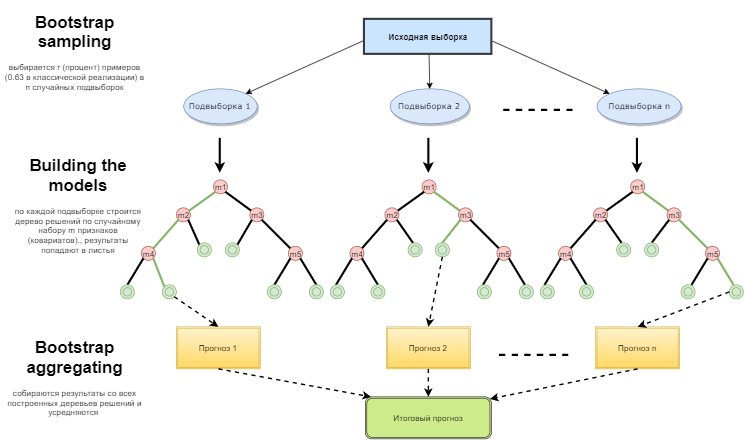

In [11]:
Image('images/rf.png', width=500)

## Пример Регрессии (взят их курса ODS)

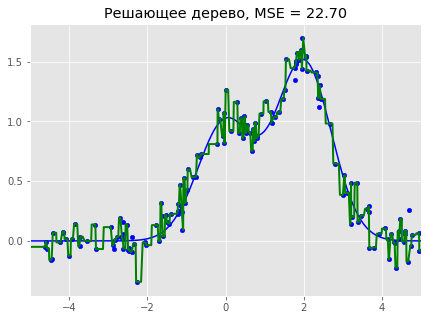

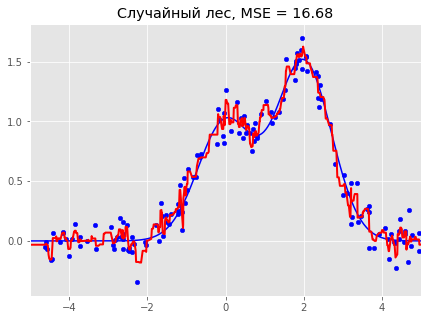

In [334]:
n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

# One decision tree regressor
dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(7, 5))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Решающее дерево, MSE = %.2f" 
          % np.sum((y_test - d_predict) ** 2))

# Random Forest
rf = RandomForestRegressor(n_estimators=10).fit(X_train, y_train)
rf_predict = rf.predict(X_test)

plt.figure(figsize=(7, 5))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "r", lw=2)
plt.xlim([-5, 5])
plt.title("Случайный лес, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));

## Пример Классификации (взят их курса ODS)

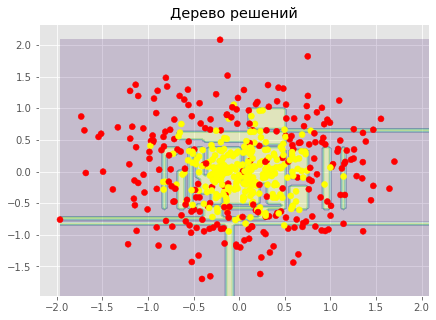

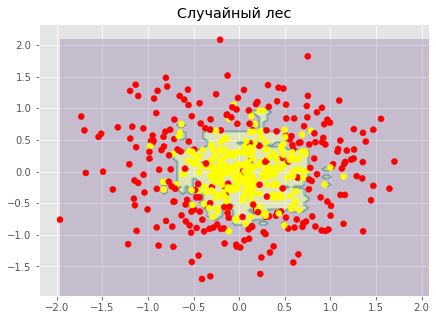

In [333]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X, y, test_size=0.2)

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_circles, y_train_circles)

plt.figure(figsize=(7, 5))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.title("Дерево решений")
plt.show()

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_circles, y_train_circles)
plt.figure(figsize=(7, 5))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.title("Случайный лес")
plt.show()

# 6. RF - идеальный алгоритм.(Нет)

Посмотрим, что происходит с произвольной задачей.

In [352]:
# Инициализируем задачу
X, y = make_classification(n_samples=10000, n_features=50, n_informative=40, shuffle=False, random_state=228)


In [353]:
# Инициализируем валидацию
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc, test_acc = [], []

# Обучаем на тренировочном датасете
for ntrees in [5, 10, 15, 20, 30, 50, 75, 100]:
    rfc = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    temp_train_acc, temp_test_acc = [], []
    for train_index, test_index in skf.split(X, y):
        X_train, y_train, X_test, y_test = X[train_index,:],y[train_index], X[test_index, :], y[test_index]

        rfc.fit(X_train, y_train)
        
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 91.80% with 100 trees


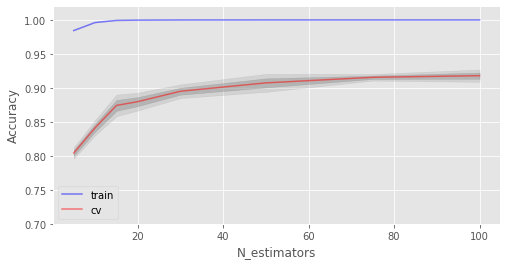

In [354]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(trees_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(trees_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.70,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators");

Accuraсy стабильно растет при увеличении количества эстиматоров. Но можем ли мы достигнуть нуля? Нет.

Ошибка на тестовой выборке упрется в асимптоту. Почему? Вспомним формулу для Variance.

$$\mathbb{D}_{a}a(x)=\frac{1}{B}\sigma^2 + \frac{(B-1)}{B}\rho\sigma^2$$

При большом количестве деревьев первое слагаемое уйдет в ноль, но корреляция будет расти, так как появится много сильноскоррелированных деревьев, которые обучились на одинаковых выборках.

Можно ли как-то улучшить ситуацию и уменьшить корреляцию между деревьями?

## Попробуем стандартные способы регуляризации.

Чтобы уменьшить коррелированность между деревьями можно использовать стандартные методы регуляризации для деревьев:`max_depth`, `min_samples_leaf`, `max_features`

In [363]:
# Инициализируем валидацию
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc, test_acc = [], []
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

# Обучаем на тренировочном датасете
for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, 
                                 random_state=42, 
                                 n_jobs=-1, 
                                 oob_score=True,
                                 max_features=4, # добавили
                                 max_depth=15, #немного
                                 min_samples_leaf=2) #регуляризации
    temp_train_acc, temp_test_acc = [], []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index,:], X[test_index, :]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.15% with 100 trees


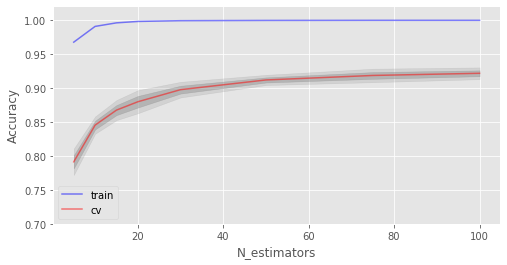

In [364]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(trees_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(trees_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.70,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators");

Чуть чуть улучшили наш алгоритм. (Опять же пример игрушечный, по жизни также делаем GridSearch или RandomSearch) для наилучшего результата.

## Итог (ВАЖНО) 
* Нам нужно использовать переобученные деревья внутри RandomForest, чтобы минимизировать их Bias. 
* Нам нужно увеличивать количество деревьев, чтобы уменьшить слагаемое с чистой дисперсией
* При этом стараясь делать деревья как можно более `различными` за счет регуляризации.
* RF - переобучается за счет сильнокоррелированных деревьев, которые фактически запоминают выборку
* RF - неидеальный алгоритм, так как никуда от коррелированности деревьев не деться. Но в большинстве случаев это очень очень хороший алгоритм. 

# 7. Важность признаков.

Очень часто хочется понять алгоритм. Почему он работает именно так, а не иначе, почему дал определенный ответ. Или если не понять его полностью, то хотя бы какие переменные больше всего влияют на результат. Из случайного леса можно довольно просто получить данную информацию.

In [367]:
hostel_data = pd.read_csv("data/hostel_factors.csv")

In [368]:
n_features = 10
features = {
    "f1":u"Персонал",
    "f2":u"Бронирование хостела ",
    "f3":u"Заезд в хостел и выезд из хостела",
    "f4":u"Состояние комнаты",
    "f5":u"Состояние общей кухни",
    "f6":u"Состояние общего пространства",
    "f7":u"Дополнительные услуги",
    "f8":u"Общие условия и удобства",
    "f9":u"Цена/качество",
    "f10":u"ССЦ"
}

rf = RandomForestRegressor(n_estimators=100, max_features=n_features, random_state=0)
X = hostel_data.drop(['hostel', 'rating'], axis=1)
y = hostel_data['rating']
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [369]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_indices = [ind+1 for ind in indices[:n_features]]

print("Feature ranking:")  
for f in range(n_features):
    print("%d. %s %f " % (
        f + 1, 
        features["f"+str(feature_indices[f])], 
        importances[indices[f]])
    )

Feature ranking:
1. Персонал 0.209187 
2. Цена/качество 0.179810 
3. ССЦ 0.123333 
4. Состояние общего пространства 0.115380 
5. Дополнительные услуги 0.076908 
6. Общие условия и удобства 0.075066 
7. Заезд в хостел и выезд из хостела 0.070897 
8. Бронирование хостела  0.058498 
9. Состояние общей кухни 0.052699 
10. Состояние комнаты 0.038222 


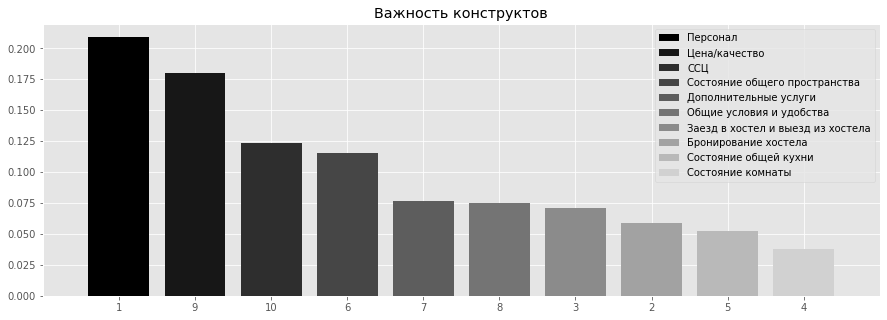

In [370]:
plt.figure(figsize=(15, 5))
plt.title(u"Важность конструктов")
bars = plt.bar(
    range(n_features), 
    importances[indices[:n_features]],
    color=([str(i/float(n_features + 1)) for i in range(n_features)])
)
ticks = plt.xticks(range(n_features), feature_indices)
plt.xlim([-1, n_features])
plt.legend(bars, [u''.join(features[f'f{i}']) for i in feature_indices])

На рисунке выше видно, что люди больше всего обращают внимание на персонал и соотношение цена/качество и на основе впечатления от данных вещей пишут свои отзывы. Но разница между этими признаками и менее влиятельными признаками не очень значительная, и выкидывание какого-то признака приведет к уменьшению точности нашей модели. Но даже на основе нашего анализа мы можем дать рекомендации отелям в первую очередь лучше готовить персонал и/или улучшить качество до заявленной цены.

# 8. Резюме

Мы рассмотрели такие концепции как:
* Boosting
* Bias-variance decomposition
* Bagging
* RandomForest

**RandomForest** - один из ключевых алгоритмов машинного обучения, который часто используется на практике, особенно, когда данных не очень много и нейронные сети не помогут.

## Повторим (ВАЖНО) 
* Нам нужно использовать переобученные деревья внутри RandomForest, чтобы минимизировать их Bias. 
* Нам нужно увеличивать количество деревьев, чтобы уменьшить слагаемое с чистой дисперсией
* При этом стараясь делать деревья как можно более `различными` за счет регуляризации.
* RF - переобучается за счет сильнокоррелированных деревьев, которые фактически запоминают выборку
* RF - неидеальный алгоритм, так как никуда от коррелированности деревьев не деться. Но в большинстве случаев это очень очень хороший алгоритм. 

**Плюсы**:
 - нечувствителен к масштабированию (и вообще к любым монотонным преобразованиям) значений признаков, связано с выбором случайных подпространств
 - не требует тщательной настройки параметров, хорошо работает «из коробки»
 - хорошо работает с пропущенными данными; сохраняет хорошую точность, если большая часть данных пропущенна
 - высокая параллелизуемость и масштабируемость.
 
**Минусы**:
 - в отличие от одного дерева, результаты случайного леса сложнее интерпретировать
 - алгоритм работает хуже многих линейных методов, когда в выборке очень много разреженных признаков (тексты, Bag of words)
 - алгоритм склонен к переобучению на некоторых задачах, особенно на зашумленных данных
 - больший размер получающихся моделей. Требуется $O(NK)$ памяти для хранения модели, где $K$ — число деревьев.

# Источники
* Bootstrap
* Bias-Variance
  * [Кратко и удобно](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)
  * [Картинки, примеры кода, простое доказательство](http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/)
  * [Много полезных картинок](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks#classification-metrics)
  * [Полное доказательство, очень хорошая статья](https://www.cs.cmu.edu/~wcohen/10-601/bias-variance.pdf)
* Bagging
  * [ODS Лекция 5](https://habr.com/ru/company/ods/blog/324402/)
* RandomForest
  * 15 раздел книги “[Elements of Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)” Jerome H. Friedman, Robert Tibshirani, and Trevor Hastie
  * больше про практические применение случайного леса и других алгоритмов композиций в официальной документации [scikit-learn](http://scikit-learn.org/stable/modules/ensemble.html)